<a href="https://colab.research.google.com/github/Jeevan-NM/Bike-Sharing-Demand-Prediction/blob/main/BikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike sharing demand prediction.**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


**Buisness context.**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ALMABetter/Capstone Projects/SeoulBikeData.csv",encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

We can see from the above that there are 14 columns and 8760 rows in the dataset loaded.

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We can see from the above that most of the data present in the dataset are of integer type or float type, and there are no null values present.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

There are no duplicate entries in the dataset loaded. 

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

From the above we can see that there are no null values present in any column of the dataset.

### Information gathered about the dataset.

The given dataset contains data about the different condition that influence the number bikes required and the bikes supplied for a particular day in Seoul which is the capital of SouthKorea.

Here bike sharing demand prdiction refers to predicting the number of bike for rent that may be required on a particular day at a particular hour with various conditions given.Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes, using the values in the other columns

The dataset given consists of 14 columns and 8760 rows i.e data of 8760 days. The dataset contains no missing, null or duplicate values, it has the data from the ending of 2017 upto the ending of 2018.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The above output shows how the numerical data of the dataset is distributed.

In [12]:
df.describe(include=['object','category'])

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


Lets check the different data present in each categorical column.

In [13]:
df['Seasons'].value_counts().reset_index()

,index,Seasons
0,Spring,2208
1,Summer,2208
2,Autumn,2184
3,Winter,2160


There are four seasons spring, summer, autumn, and winter. 

In [14]:
df['Holiday'].value_counts().reset_index()

,index,Holiday
0,No Holiday,8328
1,Holiday,432


Holiday are those day when its weekend or any official holidays.

In [15]:
df['Functioning Day'].value_counts().reset_index()

,index,Functioning Day
0,Yes,8465
1,No,295


Lets check about functioning day as it is a bit ambiguous.

In [16]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

From the above we can confirm that during non functioning days bikes are not provided for rent.

In [17]:
#segregating numerical and categorical variables
numerical_features=df.describe().columns
categorical_feature=df.describe(include=['object','category']).columns
print(f'Numerical features: ',numerical_features)
print(f'Categorical features: ',categorical_feature)

Numerical features:  Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')
Categorical features:  Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')


### Variables Description 

The description of the different variables present in the dataset are:

*   **Date** : Date of bike rented.
*   **Rented** Bike count : Number of total rentals.
*   **Hour** : Hours of the day.
*   **Temperature** : Temperature at the particular hour of the day in degree celsius.
*   **Humidity(%)** : Humidity of the day. : 
*   **Wind speed (m/s)** : Wind speed in metre per second at the particular hour of the day.
*   **Visibility** : Atmospheric visibility within 10m range.
*   **Dew point temperature(°C)** : Dew point temperature in degree ceelsius.
*   **Solar Radiation (MJ/m2)** : Indicate light and energy that comes from the sun in MJ/m2.
*   **Rainfall(mm)** : Rain fall in mm.
*   **Snowfall (cm)** : Snow fall in cm.
*   **Seasons** : Diferrent seasons(decided based on weather conditions) throughout the year present.
*   **Holiday** : Whether the day is considered a holiday.
*   **Functioning Day** : 	Whether the day is neither a weekend nor holiday. The day during which the provider of rented bike is functional.



Here the dependent variable is Rented bike count.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

From the data description we got to know that rented bikes are provided only on functional days and are not provided on non functional days so lets remove those records which contain data about non functional days.

In [19]:
#Removing data of non functional days (non rented days)
df.drop(df[df['Functioning Day'] == 'No'].index,inplace=True)

In [20]:
df['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

Since we have removed the data of non functional days and the column contains only single type of data, since it has the same value for each record we can drop the column as it of no use.

In [21]:
df.drop(['Functioning Day'], axis = 1,inplace=True)

In [22]:
df.shape

(8465, 13)

Now we can see that our data contains only 13 columns as we have removed the functional day column.

We have another categorical column which is the date. We can extract information such as the day of the week and the month which may help in a more accurate prediction.

In [23]:
#Lets check the data type of the date column
type(df['Date'][0])

str

We can see that the date column contains of data of string type. We should convert this to date type to get the day and month.

In [24]:
df['Date'][0]

'01/12/2017'

In [25]:
from datetime import datetime
df['Date']=df['Date'].apply(lambda x:datetime.strptime(x,'%d/%m/%Y'))
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Lets create another column which contains data about which day of the week does the specific date belongs to. Here 0 refers to Monday and 6 refers to sunday.

In [26]:
df['Weekday']=df['Date'].apply(lambda x:x.weekday())


In [27]:
df['Weekday'].value_counts().reset_index().sort_values(by="index").rename(columns={'index':'Weekday','Weekday':'Count of each day'}).set_index('Weekday')


,Count of each day
Weekday,
0,1248
1,1152
2,1200
3,1200
4,1224
5,1217
6,1224


The above shows the count of each day of the week in the given dataset.

In [28]:
#Now lets seperate day, month and year from the date column
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df['Day']=df['Date'].apply(lambda x:x.day)

Since we have seperated all the details fom the date column and placed it in different columns we can drop the column date as all of its data are stored separately. 

In [29]:
df.drop('Date',axis=1,inplace=True)

In [30]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Weekday,Month,Year,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,4,12,2017,1


In [31]:
df.shape

(8465, 16)

Now we can see that our data has 16 columns and 8465 rows.

### What all manipulations have you done and insights you found?

 In the data wrangling part we removed the column functioning day , it contained the data of whether the bike rental agency was functioning or not, on non functional days bikes were not provided for rent, so sinsce no bikes were provided for rent on a non functional day the data is of no use for the analysis. The data left in the functional day column were the sames after removing the non functional day data for each record, so its presence is of no use for the prediction hence we removed the whole column.

 In continuation with the above we used the Date column of the data to extract some more information from it. Since the data contained in the Date column was of the data type string we first converted into Datetime object using the strptime function from the datetime module, then we extracted the day of the week the date belongs to, month and year fom the data and stored the values in separate columns so that would be easier for the analysis. Since we had all the data of the date column stored in eparate columns we dropped the column Date. In the weekday column the data consists of values in the range 0-6
 they represent each day of the week in sequence like
 
 0 -> Monday

 1 -> Tuesday
 
 2 -> Wednesday

 3 -> Thursday

 4 -> Friday

 5 -> Saturday

 6 -> Sunday


So from this information we can analyse on which day of the week more bikes were rented, this would help in a better prediction of the dependent variable.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

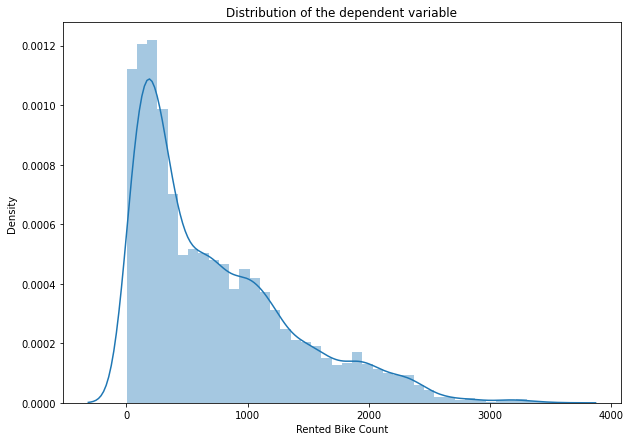

In [32]:
# Chart - 1 Distribution of the dependent variable
plt.figure(figsize = (10,7))
sns.distplot(df['Rented Bike Count'])
plt.title('Distribution of the dependent variable')
plt.ioff()

##### 1. Why did you pick the specific chart?

We have used the distplot from the seaborn library.
Distplot refers to distribution plots, it depicts the variation in the data distribution. It represents the overall distribution of the continuous data, it depicts the data by a histogram and a line in combination with it.

##### 2. What is/are the insight(s) found from the chart?

We can see from the distplot that the data is positively skewed distribution. Applying log or square root would make it a normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that on most of the number of bikes hired is in the range 400 to 500.
Since we are analysing the distribution of the dependent variable itself we cannot infer about the growth.

#### Chart - 2

In [33]:
numeric_features=df.describe().columns

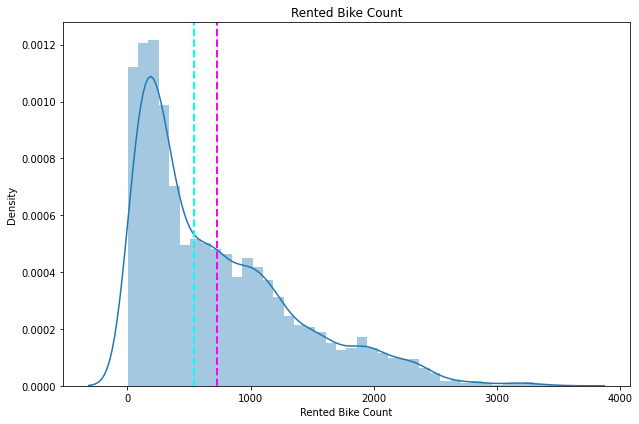

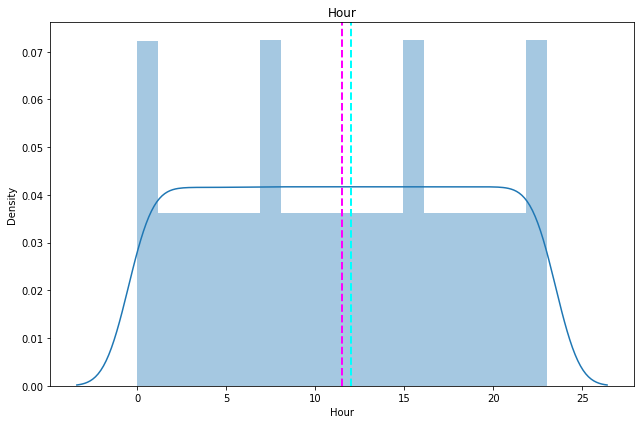

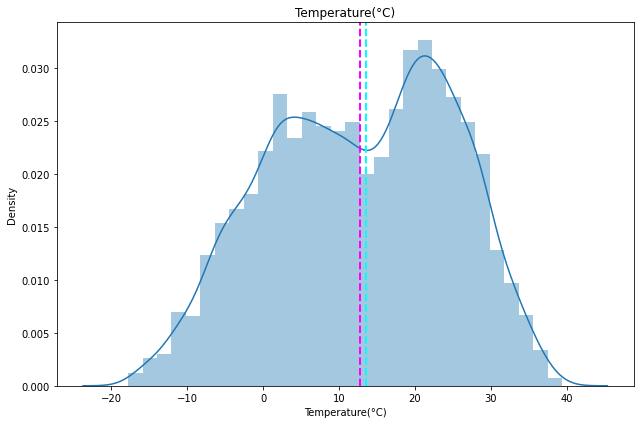

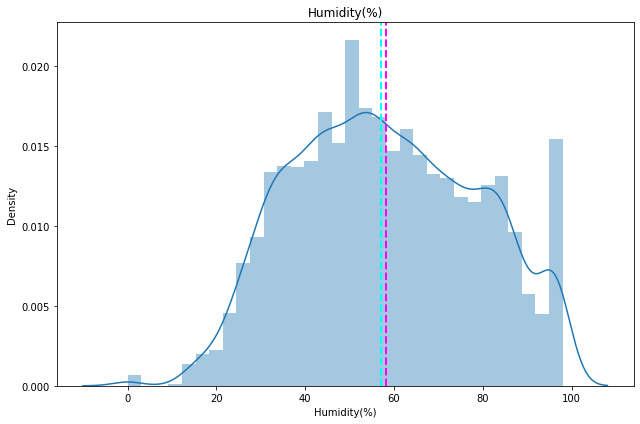

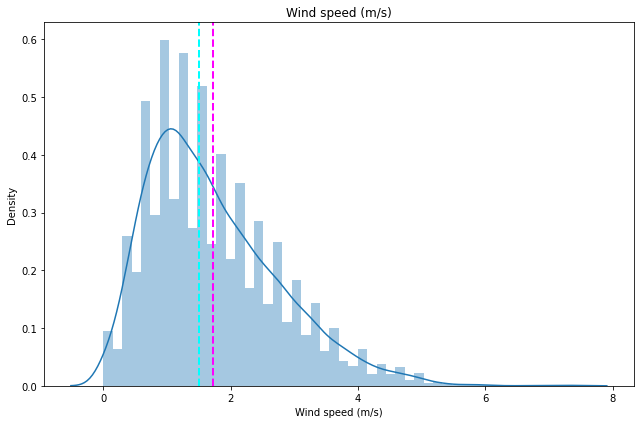

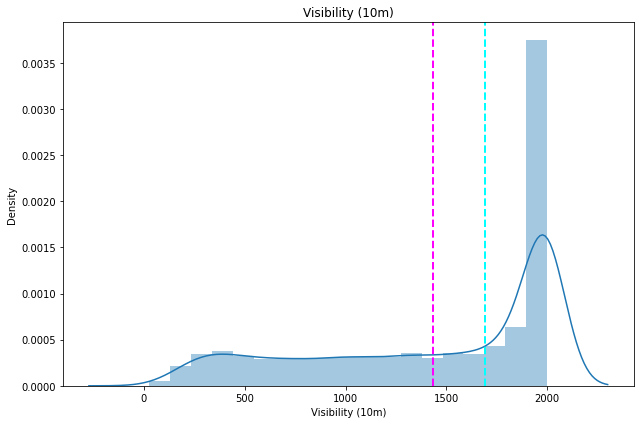

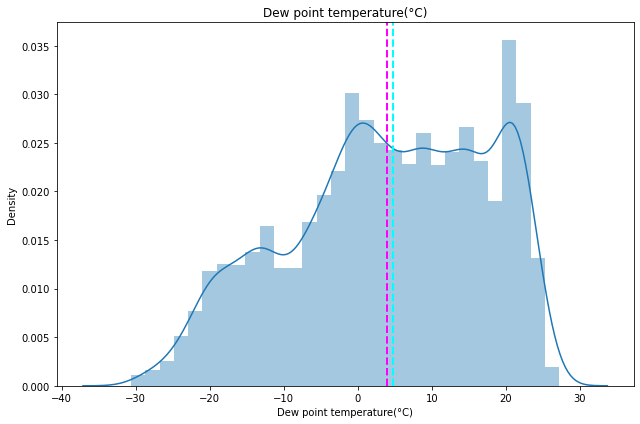

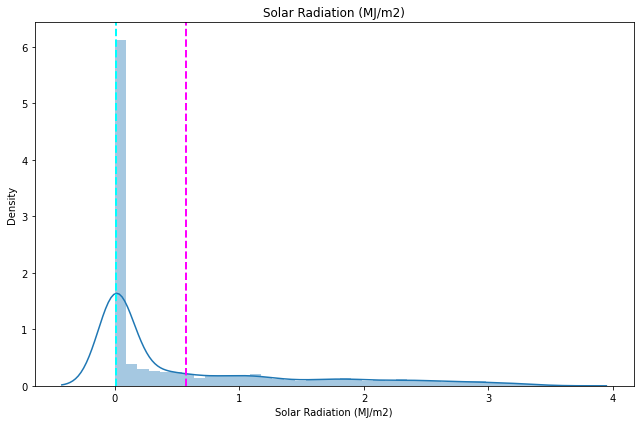

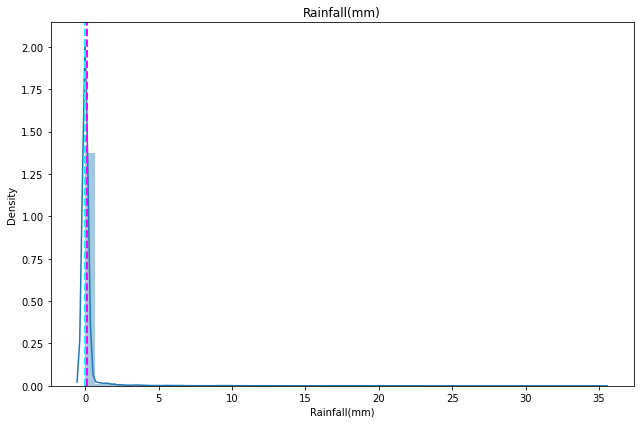

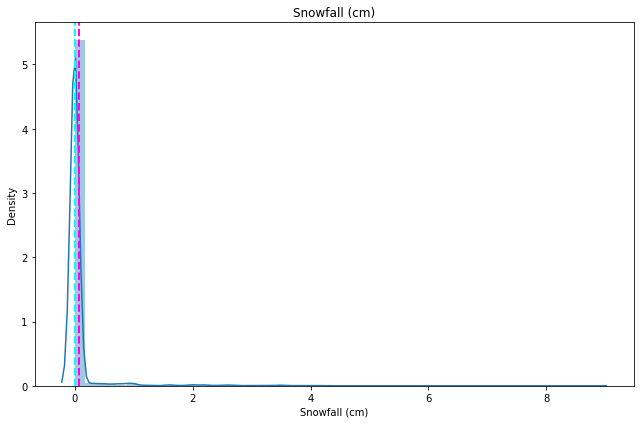

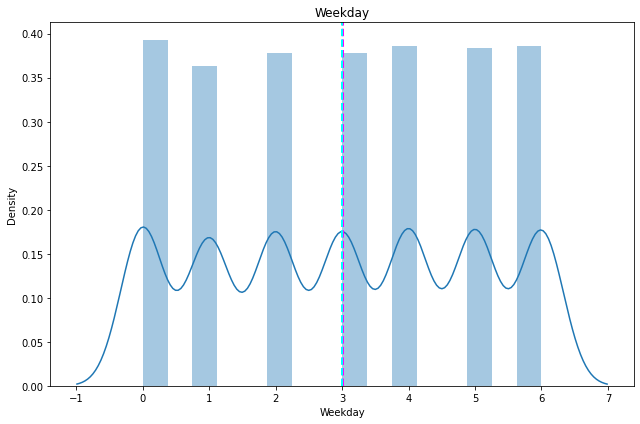

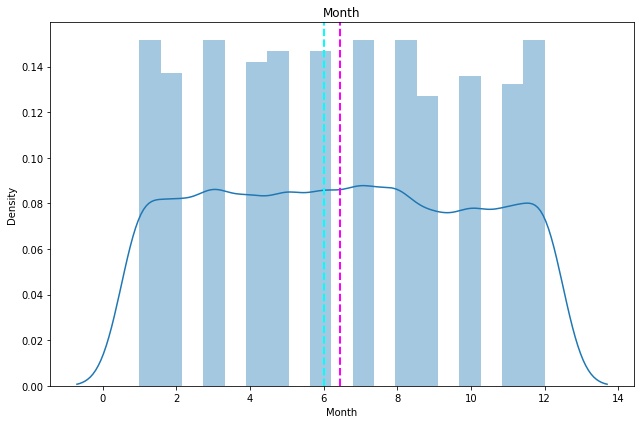

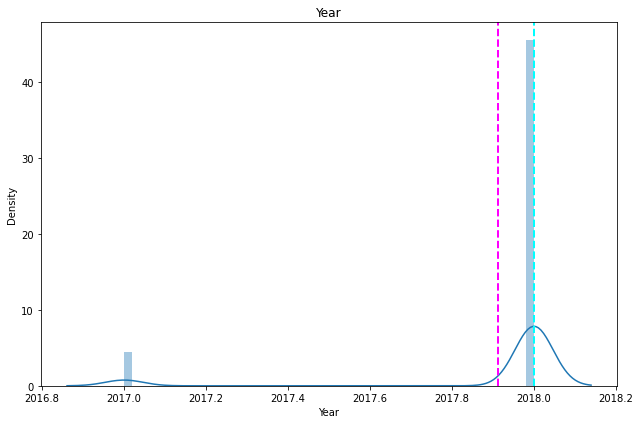

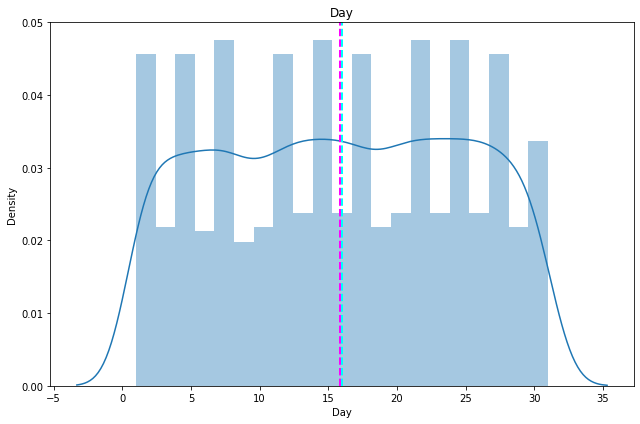

In [34]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(a=feature, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
    plt.tight_layout()
plt.show()# Chart - 2 Distribution of every numerical feature


#####  What is/are the insight(s) found from the chart?

We are able to see the distribution of the data of different numeric data. Some of the data are positively skewed, some of the data are negatively skewed and some are normaly distributed, we will be dealing with each data in the coming parts. 

#### Chart - 3

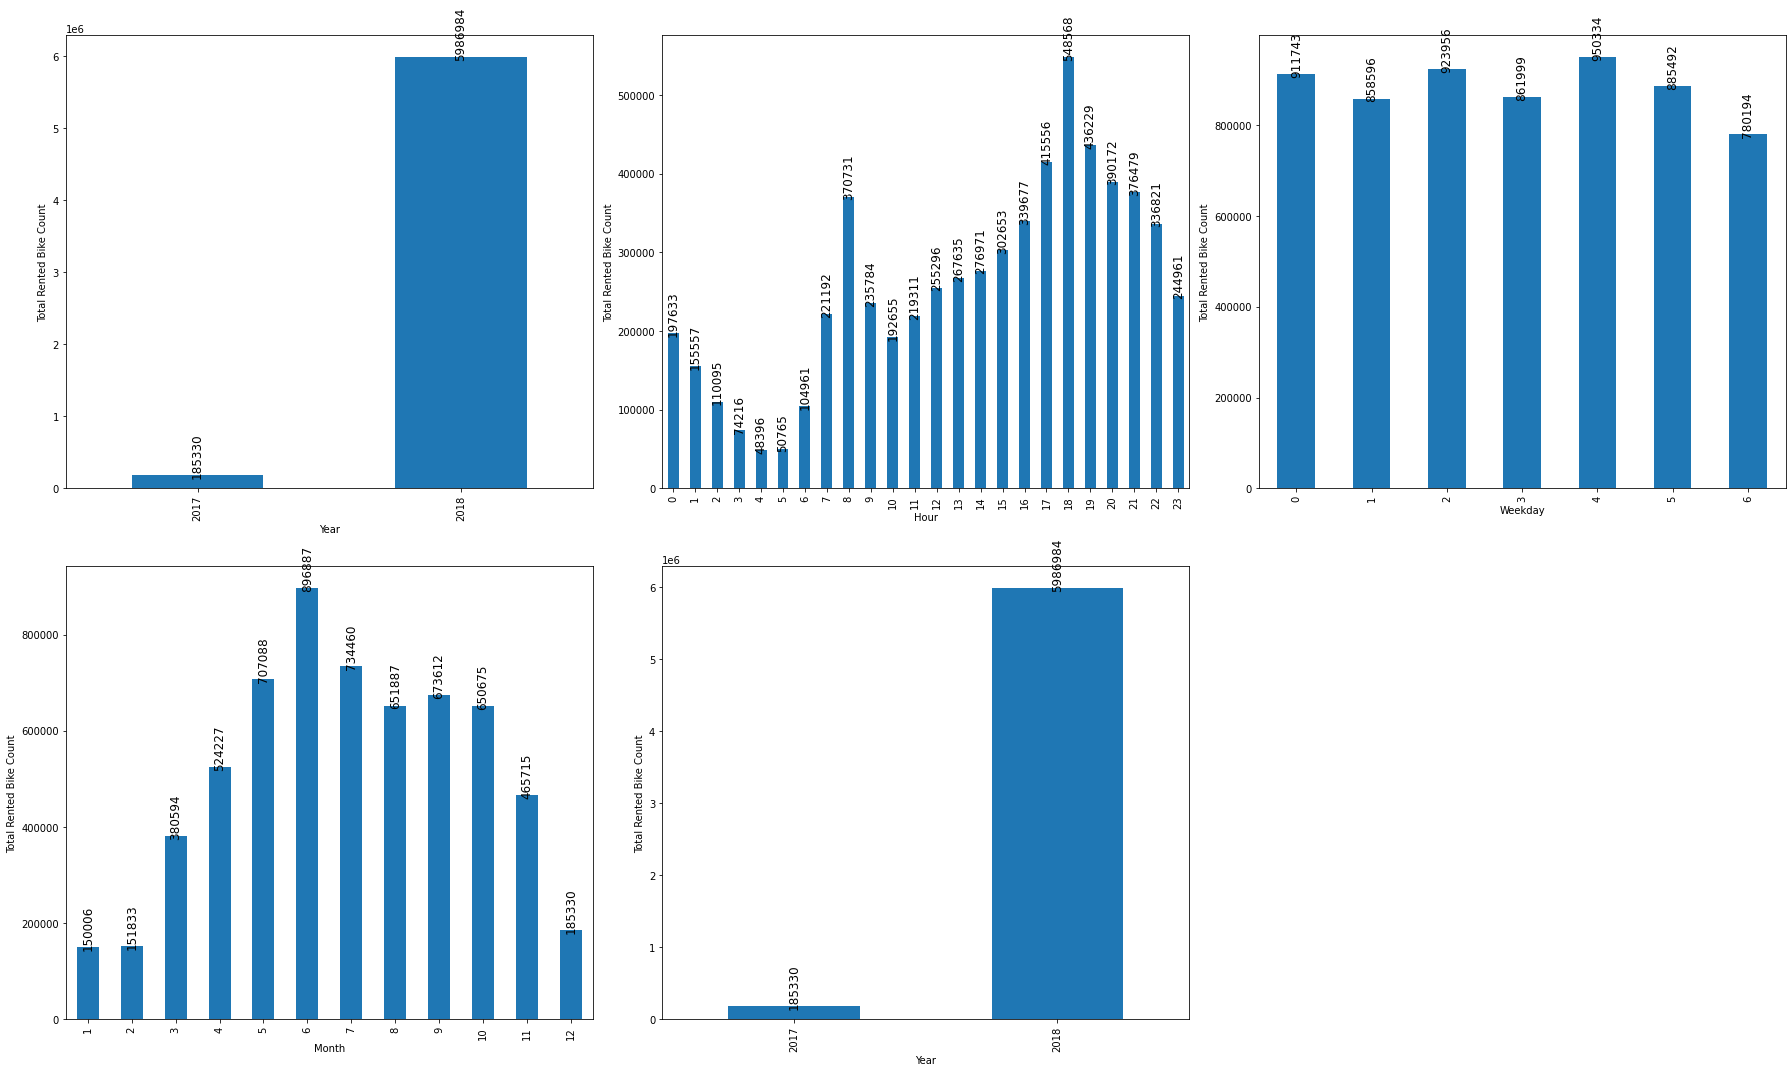

In [87]:
# Chart - 3 lets check the distribution of the discrete numerical data with respect to the count of, number of bikes rented
num_discrete_value=[feature for feature in numeric_features if len(df[feature].unique())<32]

fig = plt.figure(figsize=(25,15))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,3,index+1)
  dataset=df.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar') #kind=bar use for ploting barchart
  feature = df[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

##### 1. Why did you pick the specific chart?

We have used the barplot, since the data is discrete the barplot gives us a good visualization of the count of each of the discrete values.

##### 2. What is/are the insight(s) found from the chart?

1)From the first plot of he above figures we can see that the total number of bikes being rented on different days of the month are almost equal, which means that the demand for the bikes is almost the same troughout th month.

2)The next plot shows the total number of bikes rented at different time  of the day, we can see that the demand increases as we past afternoon and has the highest demand at evening time around 6:00 pm.

3)The next plot shows the distribution if different weeks of the day which is almost the same throughout the week.

4)The next plot shows the number of bikes rented in different months of the year, we can see that n=more bike are rented during the mid of the year compared to the start and last of the year.

5)The last shows the numberof bike rented in different years, it is obvious as our data is majory from the year 2018. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes some of the insights help in creating a positive impac in the buisness, by properly observing the trends in the market during different hours of the day and different month of the year and by supplying the required demand we can have huge difference. 

#### Chart - 4

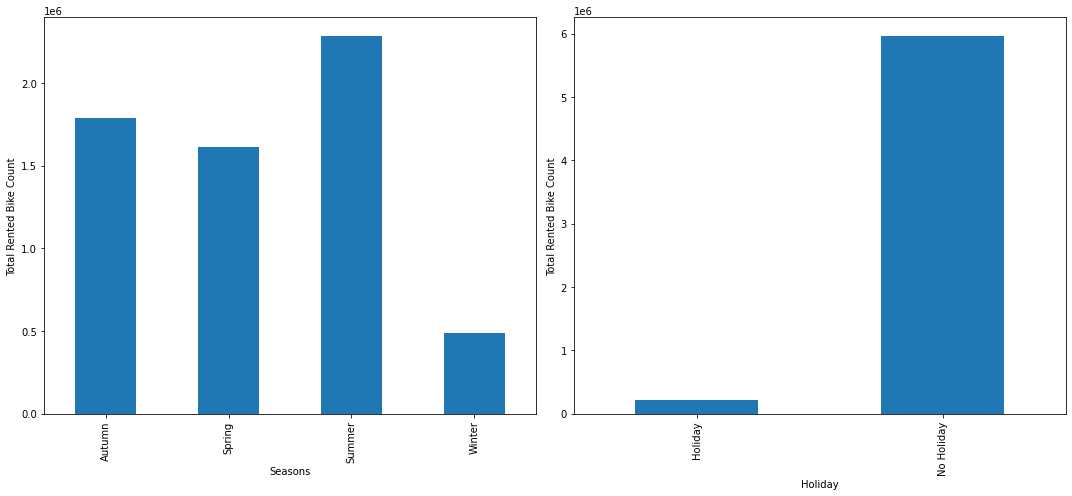

In [93]:
# Chart - 4 Lets have a view at the distribution of categorical data with respect to the count of, number of bikes rented
categorical_features=df.describe(include=('object','category')).columns
categorical_features

figure=plt.figure(figsize=(15,7))
for index,column in enumerate(categorical_features):
  feature=df[column]
  plt.subplot(1,2,index+1)
  dataset=df.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar') #kind=bar use for ploting barchart
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)


##### 1. Why did you pick the specific chart?

We have yoused the barchart as previosly used since the data is categorical(discrete).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [37]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [38]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [39]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [40]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [41]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [42]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [43]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [44]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [45]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [46]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [47]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [52]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [53]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [54]:
# Expand Contraction

#### 2. Lower Casing

In [55]:
# Lower Casing

#### 3. Removing Punctuations

In [56]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [57]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [58]:
# Remove Stopwords

In [59]:
# Remove White spaces

#### 6. Rephrase Text

In [60]:
# Rephrase Text

#### 7. Tokenization

In [61]:
# Tokenization

#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [63]:
# POS Taging

#### 10. Text Vectorization

In [64]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [66]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [67]:
# Transform Your data

### 6. Data Scaling

In [68]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [69]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [71]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [72]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [77]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [80]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [81]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***